# Activity 5.2. Autoencoder

(Last Modified September 7th 2023)

This Laboratory should take approximately two hours to complete. 

# Learning Outcomes

In this activity you will learn to: 
- Install and use the Pytorch library
- Fit deep autoencoder networks and interpret their results
- Use dimensionality reduction techniques like PCA to aid in model comparison. 

# Prerequisites

- Lecture 10
- Activity 4.2
- Activity 5.1
- pyTorch

You can install pyTorch in the terminal with the command
'pip3 install torch'

# Autoencoder

In Activity 5.1 we implemented a three layer Neural Network. In this lab we will use a more sophisticated form of Neural Network called a deep Autoencoder. Rather than creating our own implementation, we will use the python library Torch to get all the functions we need to fit our model. The train_autoencoder function in the Activity5.py file call functions from Torch to do this for us. 

## MINST Dataset
MINST is a large dataset of handwritten digits that can be downloded from: https://www.kaggle.com/c/digit-recognizer/data?train.csv. The train set contains 42K images, where each of them is of size 28 by 28 pixels. Each row of the `train.csv` file represents one of the vectorized images as well as its label. Therefore, the dataset has 785 columns = 1 + 28 x 28. Here, we use a subset of images (only digits 0 to 3) that are stored in `train_0_3.csv`. If you find that the code takes a long time to run on your laptop, feel free to use `train_0_3_small.csv` which is just a smaller subsample of `train_0_3.csv`.

We provide some helper functions written for you to not let you worry about the implementation details of pytorch. If you are interested, it is highly recommended that you read more about Pytorch and try to edit the code and implement more advanced features. A good place to start is [here](https://pytorch.org/tutorials/?utm_source=Google&utm_medium=PaidSearch&utm_campaign=%2A%2ALP+-+TM+-+General+-+HV+-+AU&utm_adgroup=PyTorch+Tutorials&utm_keyword=pytorch%20tutorials&utm_offering=AI&utm_Product=PyTorch&gclid=EAIaIQobChMI1sqWlaKF6gIV2gorCh1d9g_7EAAYASAAEgKzkvD_BwE).

In [1]:
import torch

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from sklearn.decomposition import PCA
from Activity5 import *    

In [3]:
# read data and take a look
data = pd.read_csv('train_0_3_small.csv')
# data = pd.read_csv('train_0_3.csv')

data.head()
data.shape

(1000, 785)

In [4]:
# label is in first column and the remaining columns are the image itself
# split into X and Y
X = np.array(data.iloc[:,1:])
Y = np.array(data.iloc[:,0])

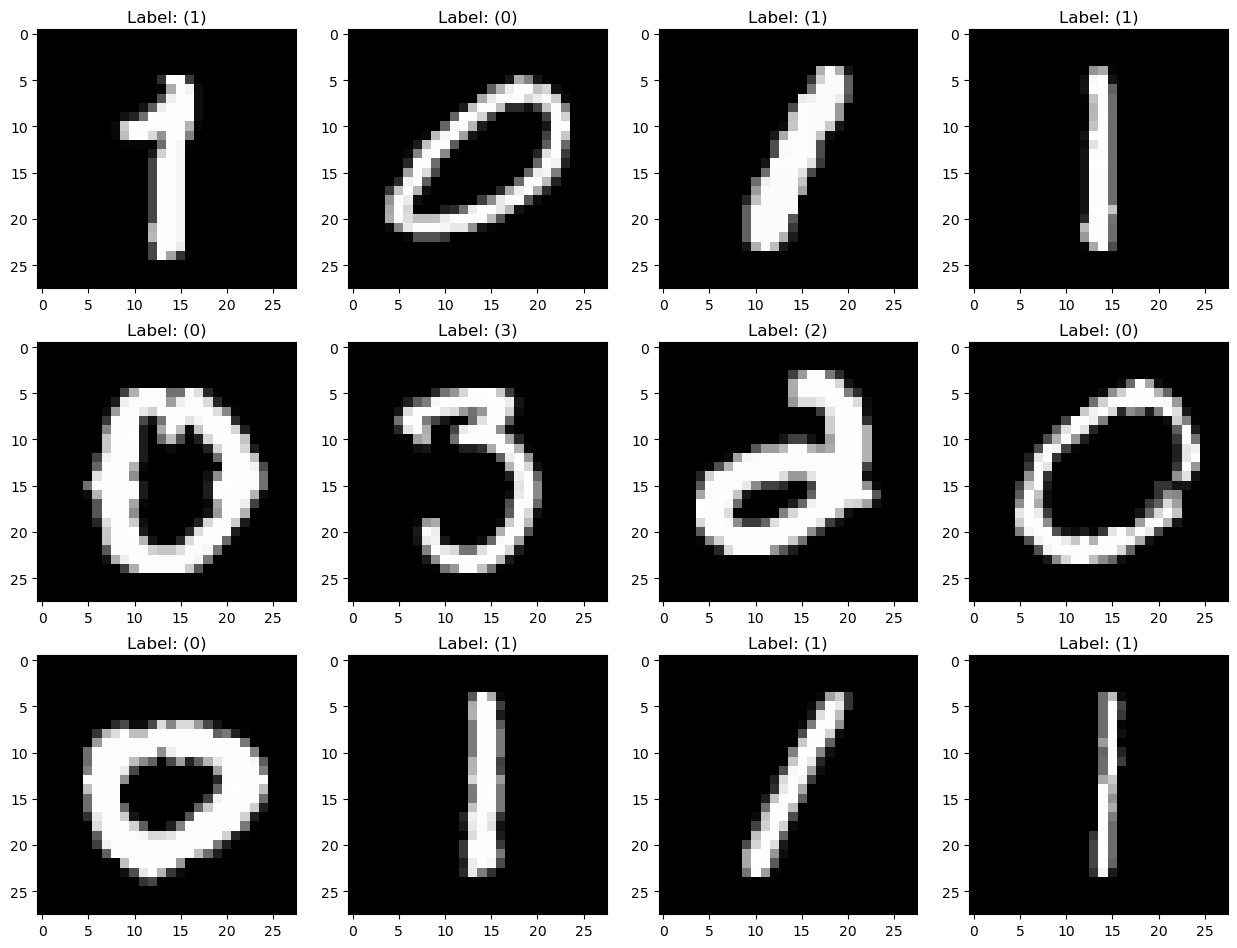

In [5]:
#visualize some samples
show_images(X[:12], Y[:12],rows=3, scale=5)

## Initialization

**Note:** If your machine is not powerful enough, you may use `train_0_3_small.csv` instead of `train_0_3.csv` which has only `1000` images. However, this few number of images might not be enough to train a deep autoencoder.

## Autoencoder
From previous chapter, recall that an autoencoder is a neural network that maps input datapoints to lower dimension spaces, then tries to reconstruct them from these low dimensional feature vectors. In the next few tasks we will explore the effect of changing the number of hidden layers and the depth of our layers. 

Additionally, we can visualize the feature vectors from the middle hidden layer (which we delibrately choose to have only two units) and compare them with the first two priciple components that we obtained by running a simple PCA. This will allow us to compare autoencoders and PCA as tools for dimensionality reduction. 

To train a deep autoencoder, we call `train_autoencoder` function, which is implemented in Activity5.py while specifying the number of units in each layer using `hidden` argument. For example, `hidden = [100, 2, 100]` means we intend to build an autoencoder with three hidden layers where the first and the last one have `100` units and the the middle one has only `2` units. 

## Task A: Fit an autoencoder

Fit an autoencoder with a learning rate of 0.0001, an activation function 'Tahn', which will run for a maximum of 10 epochs, and which has three hidden layers, with 100, 2 and 100 nodes in each layer respectively. 

In [ ]:
epochs = 10
lr = 0.001
activation = 'Tanh'
hidden = [100, 2, 100]

AE_model, losses = train_autoencoder(    
    X_train = , # training data
    hidden = , # number of layers and their units
    epochs = , # maximum number of epoches  
    activation = , # activation function
    lr =    #learning rate
)

## Task B: Plot fit quality over time

Plot how the mean squared error varies during the fitting procedure. What do you observe?

In [ ]:
fig, axs = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(8)

axs.plot(range(len(losses)), losses, label='Hidden={0}'.format(str(hidden)))

axs.legend()
axs.set_xlabel('epoch')
axs.set_ylabel('Mean Squared Error')
axs.set_title('Model performance over fitting procedure')

Now, our model is built and saved in `AE_model` variable. As mentioned before, we want to visualize the middle hidden layer which for all the model we chose to have only two units. The `get_deepfeatures` function helps us to get access to these values. Note that the index of the middle layer varies in each model (as they have different number of layers). To know how to decide which layer number you want to examine, try to print the model object.

In [ ]:
print(AE_model)
project = get_deepfeatures(AE_model,X, layer_number=2)

Now that the two dimensional reduction from our autoencoder has been retrieved we can perform principal component analysis and maintain two features to compare to our autoencoder.

## Task C: Plot Dimensionality Reduction

Create a scatter plot for both the autoencoder and the PCA dimensionality reductions. The x and y axis should be the two variables that have created during the dimensionality reduction procedure. The datapoints should be colored based on their true class. You can use matplotlib's cmap argument to help with this. 

In [157]:
## perform pca
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(normalize(X))

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
fig.set_figheight(5)
fig.set_figheight(5)


classes = np.unique(Y)

axs[0].scatter
axs[1].scatter

axs[0].set_xlabel('X1')
axs[1].set_xlabel('X1')
axs[0].set_ylabel('X2')
axs[1].set_ylabel('X2')
axs[0].set_title(str(hidden))
axs[1].set_title('PCA')
axs[0].legend()

## What Autoencoder to use?

Now that we have compared one autoencoder with PCA, the question of how to tune the model width and depth naturally arises. We will try to solve these questions in isolation first, and then combine them to find the best autoencoder we can get. 

## Task D: Width Optimisation

Write a loop that tries to find the best model width. Start with our model from the begining of the lab, and each time you widen the model, add a layer of nodes to the left and to the right. Record the final loss value for each model so that we can plot a learning curve over the model width. For a model class like a neural network this can be very expensive, so we will only perform one repetition, can keep the size of our sweep fairly limited for the purposes of finishing this lab in a timely manner. 

Note that in the standard autoencoder architecture, the number of nodes in a hidden layer is inversely proportional to that layer's distance fromthe centre. That is, the hidden layer will have the fewest nodes, layers one away from the centre will have the second least nodes, and so on. Additionally the network will be symetric about the central node, in terms of the number of layers and depth of layers. 

For this reason, as we add layers to the left and right, let us also increase the depth of these new layers by 50 each time. We will try and optimise this depth increase as well as we progress in the lab. 

When you look at the plot comparing number of layers to mean squared error, what do you think is the impact of adding more layers to the network?

In [ ]:
epochs = 10
lr = 0.001
activation = 'Tanh'
max_iter = 5
final_lossses = []
hidden = [2]
model_loss = []
for i in range(max_iter):
    hidden = 
    print('Hidden={0}'.format(hidden))
    
    res = train_autoencoder(    
            X_train = , # training data
            hidden = , # number of layers and their units
            epochs = , # maximum number of epoches  
            activation = , # activation function
            lr = ,   #learning rate
            trace=False)

    final_loss = res[1][-1]
    final_lossses += [final_loss]
    print('final loss = {0}'.format(final_loss))


In [ ]:
plt.plot(range(3, max_iter+3), final_lossses)

## Task E: Depth Optimisation

Next, write a loop that tries to find the best model depth. Start with our model from the begining of the lab, and each time you deepen the model, add 100 nodes the left and right layers. Record the final loss value for each model so that we can plot a learning curve over the model width.

When you look at the plot comparing the depth of the deepest layer to mean squared error, what do you think is the impact of adding more neurons to a layer?

In [ ]:
epochs = 10
lr = 0.001
activation = 'Tanh'
max_iter = 5
final_lossses = []

model_loss = []
for i in range(max_iter):
    hidden = 
    print('Hidden={0}'.format(hidden))
    
    res = train_autoencoder(    
            X_train = , # training data
            hidden = , # number of layers and their units
            epochs = , # maximum number of epoches  
            activation = , # activation function
            lr = ,   #learning rate
            trace=False)

    final_loss = res[1][-1]
    final_lossses += [final_loss]

    print('final loss = {0}'.format(final_loss))

In [ ]:
plt.plot(range(100, (max_iter+1)*(100), 100), final_lossses)

## Depth and Width Optimisation

Next, let's try and find the optimal tradeoff between the depth of our autoencoder layers and the number of layers. 

## Task F: Optimal Autoencoder

Find the optimal tradeoff between number of nodes in the deepest layer and number of layers. Keep track of the number of layers and maximum depth and the plot a heatmap of this tradeoff. In all cases, use our standard `hidden = [100, 2, 100]` as the starting point. Even with the `train_0_3_small.csv` dataset this can take a few minutes. 

In [ ]:
epochs = 10
lr = 0.001
activation = 'Tanh'

depth_increment = [25, 50, 100, 200]
max_layers = 5

models = np.empty(shape=(len(depth_increment), max_layers), dtype=object)
losses = np.zeros(shape=(len(depth_increment), max_layers))
hidden_layers = np.empty(shape=(len(depth_increment), max_layers), dtype=list)
for i, d_i in enumerate(depth_increment):
    hidden = 
    for j in range(max_layers):
        print('Hidden={0}'.format(hidden))
                
        res = train_autoencoder(    
                        X_train = , # training data
                        hidden = , # number of layers and their units
                        epochs = , # maximum number of epoches  
                        activation = , # activation function
                        lr = ,   #learning rate
                        trace=False)
                       
        model, loss_traj = res

        models[i, j] = model
        losses[i, j] = loss_traj[-1]
        hidden_layers[i, j] = hidden

        hidden = 

    print('final loss = {0}'.format(loss_traj[-1]))

## Task G: Compare Dimensionality Reduction

Let us return to the dimensionality reduction plots we looked at in Task C, but now compare every choice of model we have seen so far. 
Complete the code below to create a grid of plots comparing the model performance with the various hyperparameter chocies we made. Which set of hyperparameters do you think works best? How does this compare to our PCA result?

In [ ]:
fig, axs = plt.subplots(len(depth_increment), max_layers)
fig.set_figheight(6*len(depth_increment))
fig.set_figwidth(6*max_layers)

for i, d_e in enumerate(depth_increment):
    for j in range(max_layers):
        hidden = hidden_layers[i, j]
        model = models[i, j]
        loss = losses[i, j]
        if (i==0 and j ==0) or j!=0:
            mid = 
            project = 
            axs[i, j]
            axs[i, j].set_xlabel('X1')
            axs[i, j].set_ylabel('X2')
            axs[i, j].set_title(str(hidden))

## perform pca
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(normalize(X))
axs[-1, 0].
axs[-1, 0].set_xlabel('X1')
axs[-1, 0].set_ylabel('X2')
axs[-1, 0].set_title('PCA')

## Task G: Examples of Model Output

Let's conclude this lab by using the `show_images` function from Activity5.py. This will give us a visual illustration of how well our model did at fitting the data. 

In [168]:
X_pre = get_dataloader(X,autoencoder=True,return_dataset=True)[1].tensors[0]

We can look directly at our data to see what the true classes are:

In [ ]:
show_images(X[:10], Y[:10])

Or we can test how well our model with hidden layers `[100, 2, 100]` performed:

In [ ]:
with torch.no_grad():
    out = models[0, 0](X_pre)
show_images(out[:10])

With this visual inspection of our results, which model do you think reconstructed the truth best?

In [ ]:
print('True Data')
show_images(X[:10], Y[:10])

with torch.no_grad():
    for i, d_e in enumerate(depth_increment):
        for j in range(max_layers):
            if (i==0 and j == 0) or j!=0:
                hidden = hidden_layers[i, j]
                print(hidden)
                out = models[i, j](X_pre)
                show_images(out[:10])


## Discussions
1- Does increasing the number of layers help us creating more discreminative features? 

2- In general, how the number of hidden layers (i.e., the depth of the autoencoder) affects the performance of the network (in terms of reconstruction accuracy and time complexity)?

3- In typical problems, what factors prevent us from building very deep networks (with hundreds of layers)?

4- What would be the effect of increasing the maximum number of epochs?